# Problems

In this code you would find the resolutions of all the problems for Computer Infrastructure course - ATU

At first, I had to instan "yfinance" since it wasn't working for me. I did a simple research and got that with bellow code I would be able to install it in this notebook

In [2]:
pip install yfinance


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Problem 1

In [3]:
import yfinance as yf # To get Tickers data from yfinance
from datetime import datetime # For timestamp in the file name
import os # Folder manipulation
import pandas as pd # Data manipulation

def get_data(period="5d"):
    tickers = ["AAPL", "META", "AMZN", "NFLX", "GOOG"]
    data_frames = []
    
    for symbol in tickers:
        ticker = yf.Ticker(symbol)
        data = ticker.history(period=period)
        data['Ticker'] = symbol  # Add a column to identify the ticker
        data_frames.append(data)
    
    # Combine all data into a single DataFrame
    combined_data = pd.concat(data_frames)
    
    # Reset index so Date becomes a column
    combined_data.reset_index(inplace=True)
    
    # Create folder if it doesn't exist
    os.makedirs("data", exist_ok=True)
    
    # Create timestamped filename
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filename = f"{timestamp}.csv"
    filepath = os.path.join("data", filename)
    
    # Save to CSV
    combined_data.to_csv(filepath, index=False)
    print(f"Data saved to {filepath}")
    
    return combined_data

# Example usage
df = get_data()

Data saved to data/20251108-083202.csv


## Problem 2

The following code opens the lates CSV in "data" folder and creates a plot with the information.

/tmp/ipykernel_2515/1321887511.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


NameError: name 'plots_folder' is not defined

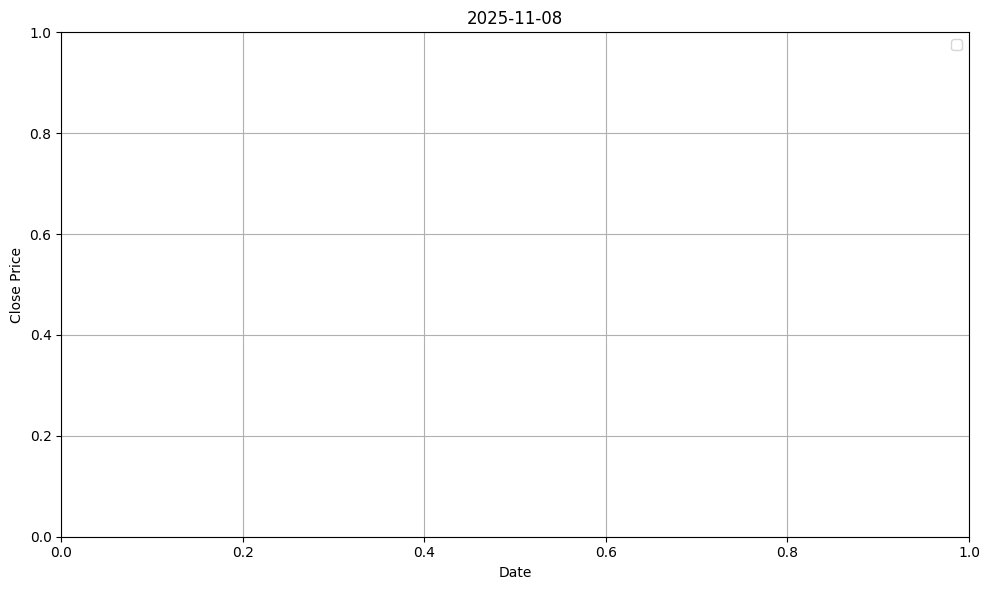

In [8]:
import matplotlib.pyplot as plt # We import matplotlib to generate plots, as we have already imported "os" librebary, we don't need to do it again.

def plot_data():
    # Folders
    data_folder = "data"
    plots_folder = "plots"

    # First, we make sure that plots folder exist so we don't get error https://www.w3schools.com/python/ref_os_makedirs.asp
    os.makedirs(plots_folder, exist_ok=True)

    data_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".csv")]
    if not data_files: # In case it doesn't find any file, print a message.
        print("No data files found in the data folder.")
        return

    latest_file = max(data_files, key=os.path.getmtime) # Returns the time of the last modification of the file (considering it might be the last one)

    # Load data
    df = pd.read_csv(latest_file)

# Create the plot
plt.figure(figsize=(10, 6))

# Format the plot
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(datetime.now().strftime("%Y-%m-%d"))  # current date as title
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plot_filename = os.path.join(plots_folder, f"{timestamp}.png")
plt.savefig(plot_filename)
plt.close()

print(f"Plot has been saved: {plot_filename}")